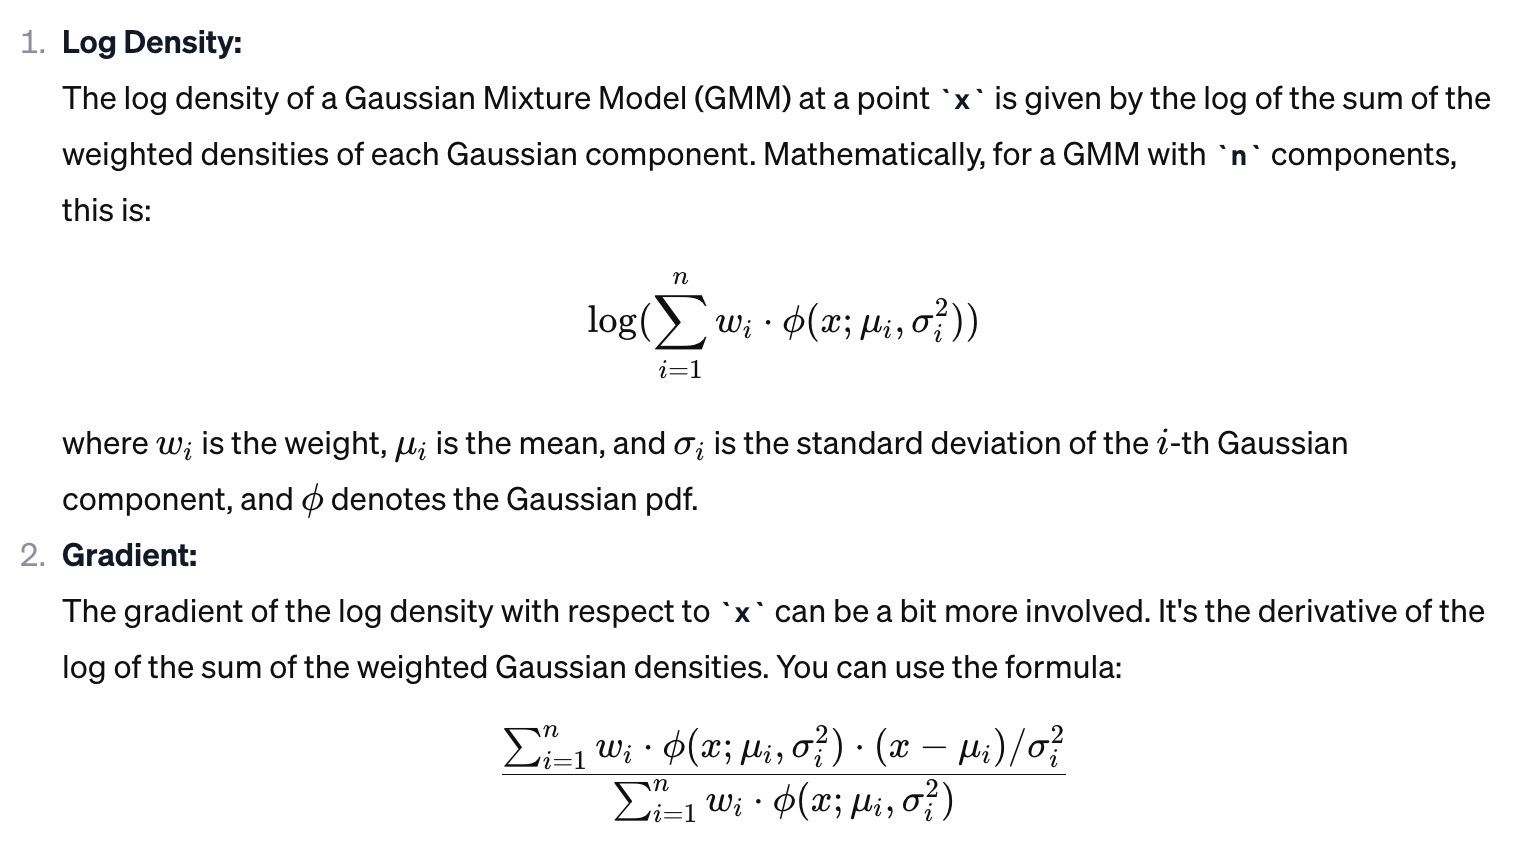

In [132]:
from IPython.display import Image
Image(filename='images/gmm.jpg')

In [1]:
import importlib

In [3]:
# importlib.reload(envs.multi_modal)

from envs.multi_modal import MetropolisHastingsSampler, GaussianMixtures, LangevinSampler, EnsembleLangevinSampler
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [4]:
means = [np.array([1, 1]), np.array([-1, -1])]  # Example 2D means
covariances = [np.eye(2), np.eye(2)]  # 2x2 identity matrices for each component
weights = [0.5, 0.5]  # Equal weights for each component

gmm_env = GaussianMixtures(means, covariances, weights)

In [5]:
sampler = MetropolisHastingsSampler(gmm_env)
samps = sampler.sample(50000)
print("Acceptance Rate:", sampler.acceptance_rate())
print("Average Moved Distance:", sampler.average_moved_distance())

Acceptance Rate: 0.62128
Average Moved Distance: 0.6716430166009281


### MH-MCMC: average distance and acceptance rate for different proposals

100%|██████████| 10/10 [00:09<00:00,  1.06it/s]


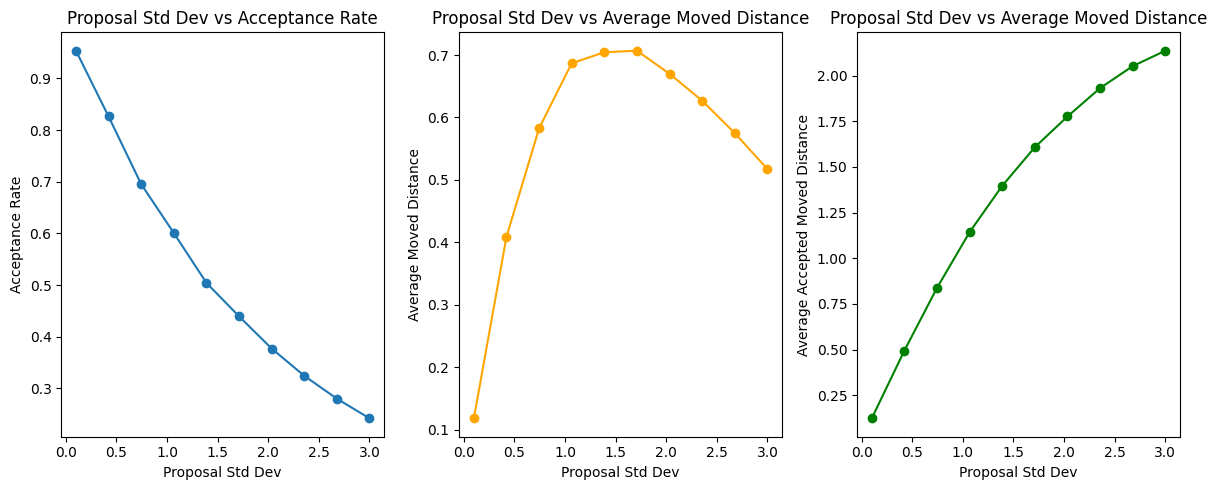

In [52]:
# Define a range of proposal_std values
proposal_stds = np.linspace(0.1, 3.0, 10)  # Adjust this range as needed

# Lists to store results
acceptance_rates = []
average_distances = []
average_acc_distances = []

# Run the sampler for each proposal_std
for std in tqdm(proposal_stds):
    sampler = MetropolisHastingsSampler(gmm_env, proposal_std=std)
    sampler.sample(10000)  # Adjust the number of samples as needed

    # Record the statistics
    acceptance_rates.append(sampler.acceptance_rate())
    average_distances.append(sampler.average_moved_distance())
    average_acc_distances.append(sampler.average_moved_distance(total=False))

# Plotting
plt.figure(figsize=(12, 5))

# Plot 1: proposal_std vs Acceptance Rate
plt.subplot(1, 3, 1)
plt.plot(proposal_stds, acceptance_rates, marker='o')
plt.xlabel('Proposal Std Dev')
plt.ylabel('Acceptance Rate')
plt.title('Proposal Std Dev vs Acceptance Rate')

# Plot 2: proposal_std vs Average Moved Distance
plt.subplot(1, 3, 2)
plt.plot(proposal_stds, average_distances, marker='o', color='orange')
plt.xlabel('Proposal Std Dev')
plt.ylabel('Average Moved Distance')
plt.title('Proposal Std Dev vs Average Moved Distance')

# Plot 2: proposal_std vs Average Accepted Moved Distance
plt.subplot(1, 3, 3)
plt.plot(proposal_stds, average_acc_distances, marker='o', color='green')
plt.xlabel('Proposal Std Dev')
plt.ylabel('Average Accepted Moved Distance')
plt.title('Proposal Std Dev vs Average Moved Distance')

plt.tight_layout()
plt.show()

### Different $\epsilon$s and $\alpha$s for Langevin diffusion

In [6]:
alphas = [0, 0.1, 0.2, 0.5, 1]  # Adjust these ranges as needed
epsilons = np.linspace(0.05, 0.5, 5)

# Grid to store results
acceptance_rates = np.zeros((len(alphas), len(epsilons)))
average_distances = np.zeros((len(alphas), len(epsilons)))
average_acc_distances = np.zeros((len(alphas), len(epsilons)))

for i, alpha in enumerate(tqdm(alphas)):
    for j, epsilon in enumerate(epsilons):
        sampler = LangevinSampler(gmm_env, epsilon=epsilon, alpha=alpha)
        sampler.sample(10000)  # Adjust the number of samples as needed

        acceptance_rates[i, j] = sampler.acceptance_rate()
        average_distances[i, j] = sampler.average_moved_distance(total=True)
        average_acc_distances[i, j] = sampler.average_moved_distance(total=False)

100%|██████████| 5/5 [00:46<00:00,  9.26s/it]


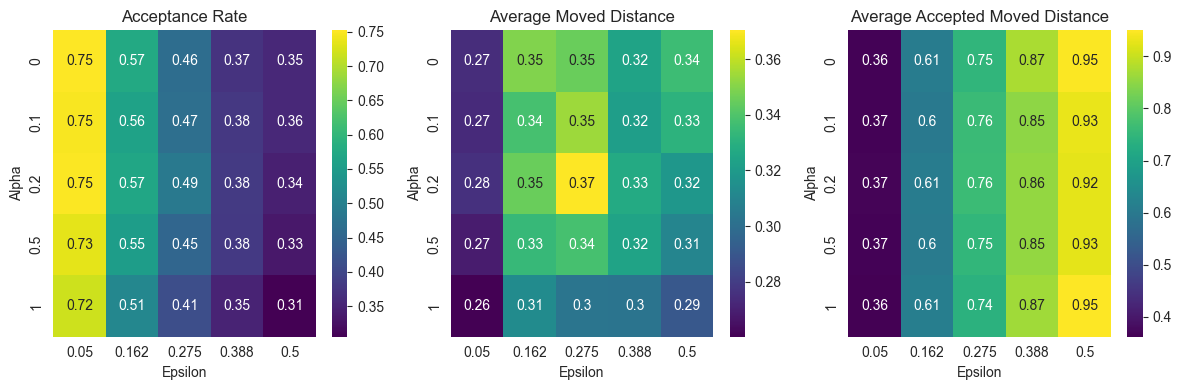

In [7]:
import seaborn as sns

epsilons = np.round(epsilons, decimals=3)
# Plotting
plt.figure(figsize=(12, 4))

# Heatmap for Acceptance Rates
plt.subplot(1, 3, 1)
sns.heatmap(acceptance_rates, annot=True, xticklabels=epsilons, yticklabels=alphas, cmap='viridis')
plt.title('Acceptance Rate')
plt.xlabel('Epsilon')
plt.ylabel('Alpha')

# Heatmap for Average Moved Distance
plt.subplot(1, 3, 2)
sns.heatmap(average_distances, annot=True, xticklabels=epsilons, yticklabels=alphas, cmap='viridis')
plt.title('Average Moved Distance')
plt.xlabel('Epsilon')
plt.ylabel('Alpha')

plt.subplot(1, 3, 3)
sns.heatmap(average_acc_distances, annot=True, xticklabels=epsilons, yticklabels=alphas, cmap='viridis')
plt.title('Average Accepted Moved Distance')
plt.xlabel('Epsilon')
plt.ylabel('Alpha')

plt.tight_layout()
plt.show()

In [98]:
alphas = [0, 1, 2, 5, 10]  # Adjust these ranges as needed
epsilons = np.linspace(0.005, 0.1, 5)

# Grid to store results
acceptance_rates = np.zeros((len(alphas), len(epsilons)))
average_distances = np.zeros((len(alphas), len(epsilons)))
average_acc_distances = np.zeros((len(alphas), len(epsilons)))

for i, alpha in enumerate(tqdm(alphas)):
    for j, epsilon in enumerate(epsilons):
        sampler = LangevinSampler(gmm_env, epsilon=epsilon, alpha=alpha)
        sampler.sample(10000)  # Adjust the number of samples as needed

        acceptance_rates[i, j] = sampler.acceptance_rate()
        average_distances[i, j] = sampler.average_moved_distance(total=True)
        average_acc_distances[i, j] = sampler.average_moved_distance(total=False)

100%|██████████| 5/5 [00:47<00:00,  9.41s/it]


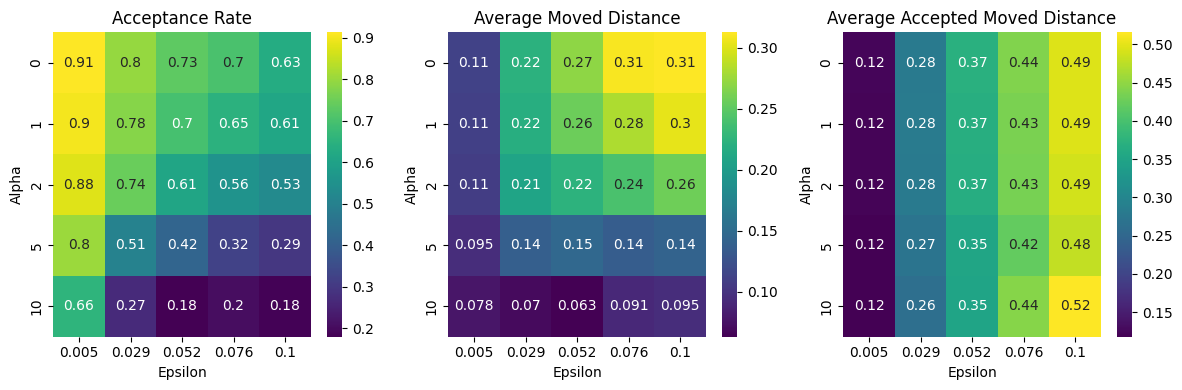

In [99]:
epsilons = np.round(epsilons, decimals=3)
# Plotting
plt.figure(figsize=(12, 4))

# Heatmap for Acceptance Rates
plt.subplot(1, 3, 1)
sns.heatmap(acceptance_rates, annot=True, xticklabels=epsilons, yticklabels=alphas, cmap='viridis')
plt.title('Acceptance Rate')
plt.xlabel('Epsilon')
plt.ylabel('Alpha')

# Heatmap for Average Moved Distance
plt.subplot(1, 3, 2)
sns.heatmap(average_distances, annot=True, xticklabels=epsilons, yticklabels=alphas, cmap='viridis')
plt.title('Average Moved Distance')
plt.xlabel('Epsilon')
plt.ylabel('Alpha')

plt.subplot(1, 3, 3)
sns.heatmap(average_acc_distances, annot=True, xticklabels=epsilons, yticklabels=alphas, cmap='viridis')
plt.title('Average Accepted Moved Distance')
plt.xlabel('Epsilon')
plt.ylabel('Alpha')

plt.tight_layout()
plt.show()

In [139]:
from scipy.stats import gaussian_kde

def plot_samples_with_contours(environment, samples):
    # Generate the contour plot from the environment
    ax = environment.contour_plot()  # Assuming this returns a matplotlib axes object

    # Overlay the samples
    samples = np.array(samples)
    # ax.scatter(samples[:, 0], samples[:, 1], c='red', s=10, alpha=0.3, label='Samples')

    # Perform Kernel Density Estimation (KDE) to estimate the density of samples
    kde = gaussian_kde(samples.T)
    x_min, x_max = samples[:, 0].min() - 1, samples[:, 0].max() + 1
    y_min, y_max = samples[:, 1].min() - 1, samples[:, 1].max() + 1
    x, y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
    positions = np.vstack([x.ravel(), y.ravel()])
    z = np.reshape(kde(positions).T, x.shape)

    # Plot the empirical contours
    ax.contour(x, y, z, colors='blue', alpha=0.5, levels=6, label='Empirical Contours')

    ax.set_title('Samples with Ground-Truth and Empirical Contours')
    ax.legend()

    plt.show()

In [8]:
vanilla_lang_sampler = LangevinSampler(gmm_env, epsilon=0.275)
vanilla_samps = vanilla_lang_sampler.sample(50000)
best_lang_sampler = LangevinSampler(gmm_env, epsilon=0.275, alpha=0.2)
lang_samps = best_lang_sampler.sample(50000)  # Adjust the number of samples as needed
best_mh_sampler = MetropolisHastingsSampler(gmm_env, proposal_std=1)
mh_samps = best_mh_sampler.sample(50000)  # Adjust the number of samples as needed

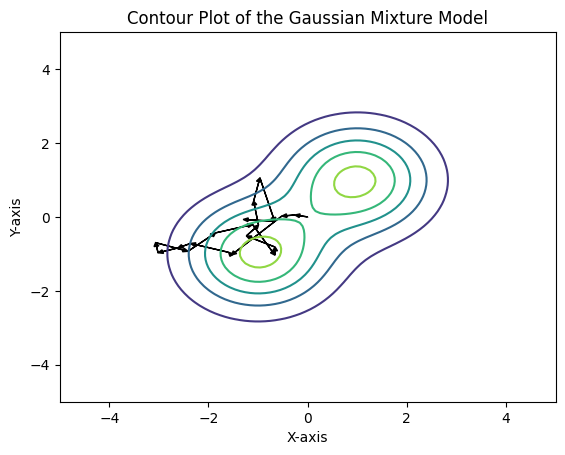

In [111]:
best_lang_sampler.plot_accepted_moves_on_contour()

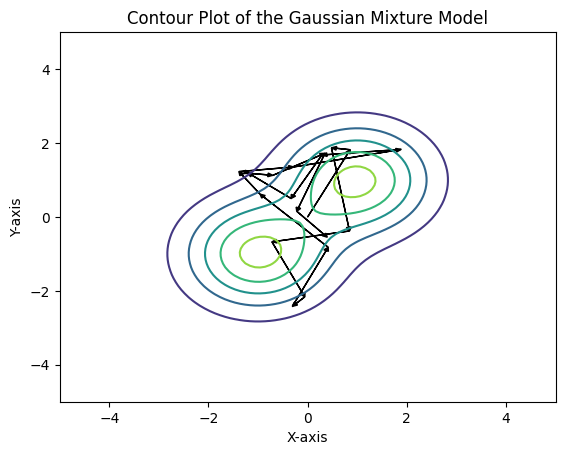

In [110]:
best_mh_sampler.plot_accepted_moves_on_contour()

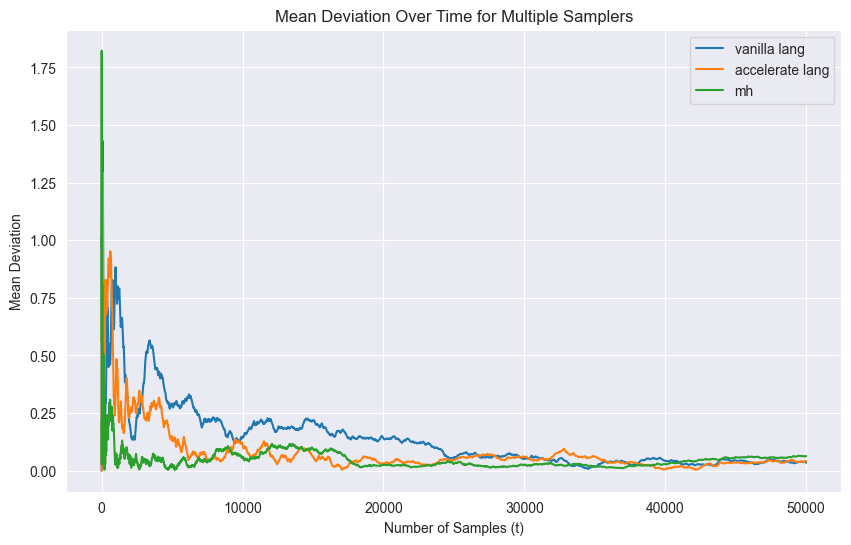

In [9]:
def calculate_ground_truth_mean(environment):
    # Weighted mean of the individual Gaussians
    weighted_means = [w * m for w, m in zip(environment.weights, environment.means)]
    ground_truth_mean = np.sum(weighted_means, axis=0)
    return ground_truth_mean

def mean_deviation_over_time(samples, ground_truth_mean):
    deviations = []
    cumulative_sum = np.zeros_like(samples[0])

    for t in range(1, len(samples) + 1):
        cumulative_sum += samples[t - 1]
        empirical_mean = cumulative_sum / t
        deviation = np.linalg.norm(empirical_mean - ground_truth_mean)
        deviations.append(deviation)

    return deviations

def plot_mean_deviation(samples_list, environment, labels):
    ground_truth_mean = calculate_ground_truth_mean(environment)
    plt.figure(figsize=(10, 6))

    for samples, label in zip(samples_list, labels):
        deviations = mean_deviation_over_time(samples, ground_truth_mean)
        plt.plot(range(1, len(samples) + 1), deviations, label=label)

    plt.xlabel('Number of Samples (t)')
    plt.ylabel('Mean Deviation')
    plt.title('Mean Deviation Over Time for Multiple Samplers')
    plt.legend()
    plt.show()

plot_mean_deviation([vanilla_samps, lang_samps, mh_samps], gmm_env, ["vanilla lang", "accelerate lang", "mh"])

In [10]:
means = [np.array([-2, -2]), np.array([2, 2])]  # Example 2D means
cov_mat = np.array([[1.5, 0.5], [0.5, 1]])
covariances = [cov_mat, cov_mat]  # 2x2 identity matrices for each component
weights = [0.5, 0.5]  # Equal weights for each component

gmm_env2 = GaussianMixtures(means, covariances, weights)

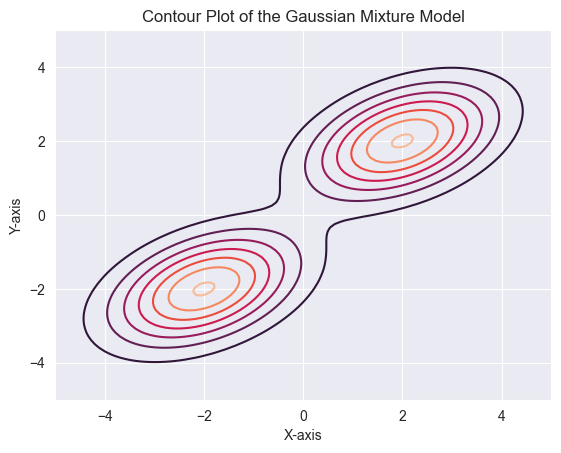

In [11]:
ax = gmm_env2.contour_plot()
plt.show()

In [12]:
alphas = [0, 0.1, 0.2, 0.5, 1]  # Adjust these ranges as needed
epsilons = np.linspace(0.05, 0.5, 5)

# Grid to store results
acceptance_rates = np.zeros((len(alphas), len(epsilons)))
average_distances = np.zeros((len(alphas), len(epsilons)))
average_acc_distances = np.zeros((len(alphas), len(epsilons)))

for i, alpha in enumerate(tqdm(alphas)):
    for j, epsilon in enumerate(epsilons):
        sampler = LangevinSampler(gmm_env2, epsilon=epsilon, alpha=alpha)
        sampler.sample(10000)  # Adjust the number of samples as needed

        acceptance_rates[i, j] = sampler.acceptance_rate()
        average_distances[i, j] = sampler.average_moved_distance(total=True)
        average_acc_distances[i, j] = sampler.average_moved_distance(total=False)

100%|██████████| 5/5 [00:46<00:00,  9.28s/it]


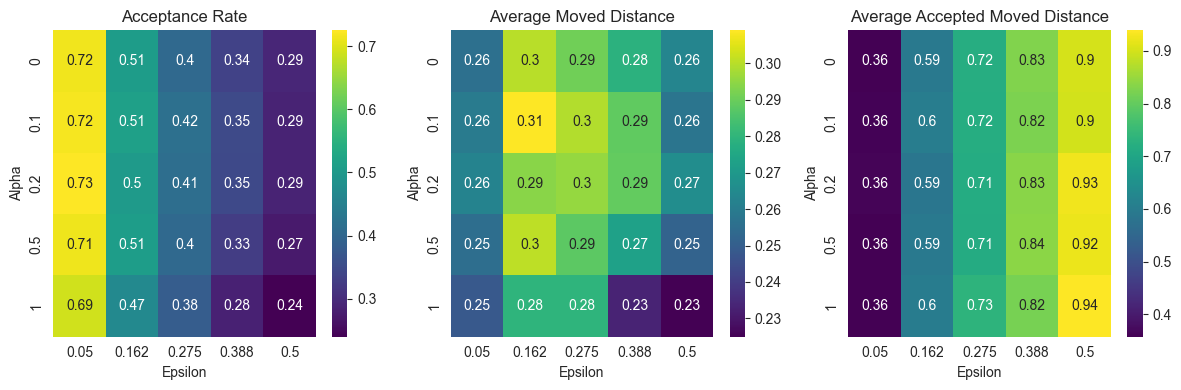

In [13]:
epsilons = np.round(epsilons, decimals=3)
# Plotting
plt.figure(figsize=(12, 4))

# Heatmap for Acceptance Rates
plt.subplot(1, 3, 1)
sns.heatmap(acceptance_rates, annot=True, xticklabels=epsilons, yticklabels=alphas, cmap='viridis')
plt.title('Acceptance Rate')
plt.xlabel('Epsilon')
plt.ylabel('Alpha')

# Heatmap for Average Moved Distance
plt.subplot(1, 3, 2)
sns.heatmap(average_distances, annot=True, xticklabels=epsilons, yticklabels=alphas, cmap='viridis')
plt.title('Average Moved Distance')
plt.xlabel('Epsilon')
plt.ylabel('Alpha')

plt.subplot(1, 3, 3)
sns.heatmap(average_acc_distances, annot=True, xticklabels=epsilons, yticklabels=alphas, cmap='viridis')
plt.title('Average Accepted Moved Distance')
plt.xlabel('Epsilon')
plt.ylabel('Alpha')

plt.tight_layout()
plt.show()

In [18]:
vanilla_lang_sampler = LangevinSampler(gmm_env2, epsilon=0.16)
vanilla_samps = vanilla_lang_sampler.sample(50000)
best_lang_sampler = LangevinSampler(gmm_env2, epsilon=0.16, alpha=0.1)
lang_samps = best_lang_sampler.sample(50000)  # Adjust the number of samples as needed
best_mh_sampler = MetropolisHastingsSampler(gmm_env2, proposal_std=1)
mh_samps = best_mh_sampler.sample(50000)  # Adjust the number of samples as needed

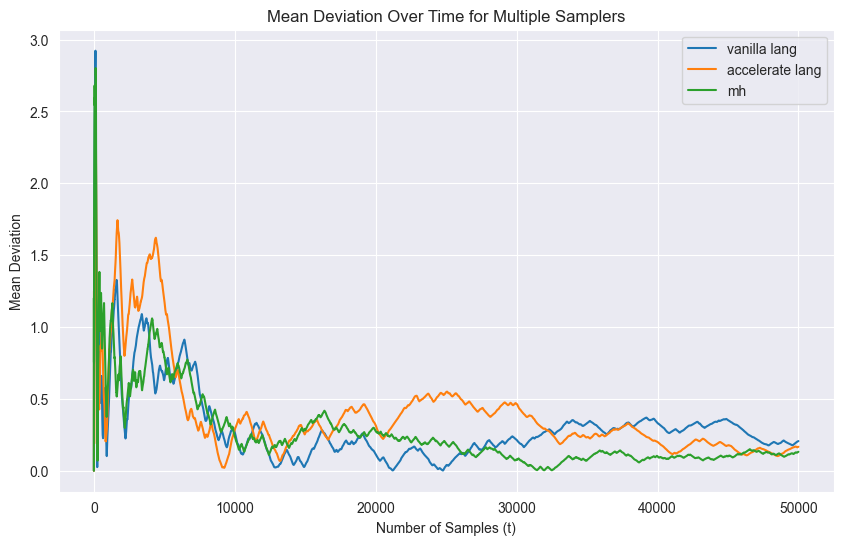

In [19]:
plot_mean_deviation([vanilla_samps, lang_samps, mh_samps], gmm_env2, ["vanilla lang", "accelerate lang", "mh"])

/var/folders/b1/r8x7wyhd49q07zq5l2mbm3d40000gn/T/ipykernel_36495/1753036638.py:20: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(x, y, z, colors='blue', alpha=0.5, levels=6, label='Empirical Contours')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


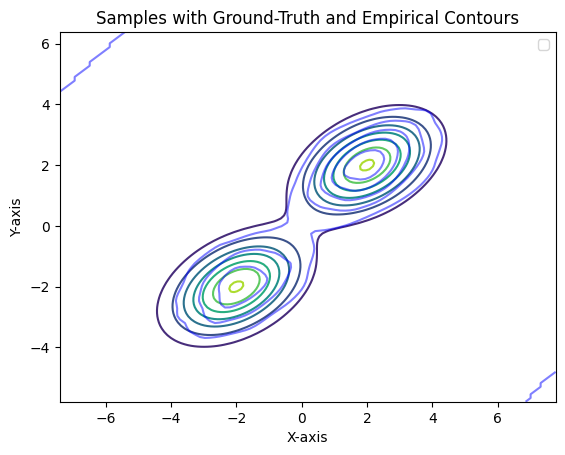

Empirical contours for vanilla Langevin MC


In [142]:
plot_samples_with_contours(gmm_env2, vanilla_samps)
print("Empirical contours for vanilla Langevin MC")

/var/folders/b1/r8x7wyhd49q07zq5l2mbm3d40000gn/T/ipykernel_36495/1753036638.py:20: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(x, y, z, colors='blue', alpha=0.5, levels=6, label='Empirical Contours')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


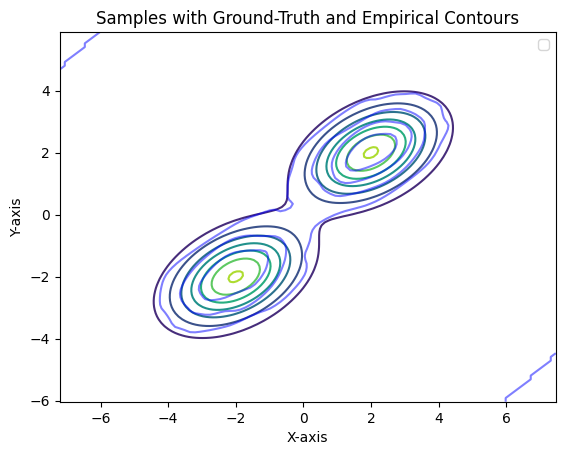

Empirical contours for accelerated Langevin MC


In [143]:
plot_samples_with_contours(gmm_env2, lang_samps)
print("Empirical contours for accelerated Langevin MC")

### Emsemble Version of the Langevin Dynamics

In [237]:
importlib.reload(envs.multi_modal)

from envs.multi_modal import MetropolisHastingsSampler, GaussianMixtures, LangevinSampler, EnsembleLangevinSampler
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

### Fixing N = 50 to be the ensemble size

In [184]:
vanilla_ens_sampler = EnsembleLangevinSampler(gmm_env2, ensemble=50, epsilon=0.16, alpha=0)
d = vanilla_ens_sampler.sample(iterations=2000, use_cov=True)

100%|██████████| 2000/2000 [00:00<00:00, 3286.44it/s]


In [197]:
alphas = [0, 0.1, 0.15, 0.2, 0.3, 0.5]  # Adjust these ranges as needed
epsilons = np.linspace(0.01, 0.3, 8)

# Grid to store results
acceptance_rates = np.zeros((len(alphas), len(epsilons)))
average_distances = np.zeros((len(alphas), len(epsilons)))
average_acc_distances = np.zeros((len(alphas), len(epsilons)))

for i, alpha in enumerate(alphas):
    for j, epsilon in enumerate(epsilons):
        sampler = EnsembleLangevinSampler(gmm_env2, ensemble=50, epsilon=epsilon, alpha=alpha)
        sampler.sample(iterations=10000, use_cov=True)  # Adjust the number of samples as needed

        acceptance_rates[i, j] = sampler.acceptance_rate()
        average_distances[i, j] = sampler.average_moved_distance(total=True)
        average_acc_distances[i, j] = sampler.average_moved_distance(total=False)

100%|██████████| 10000/10000 [00:02<00:00, 3497.99it/s]


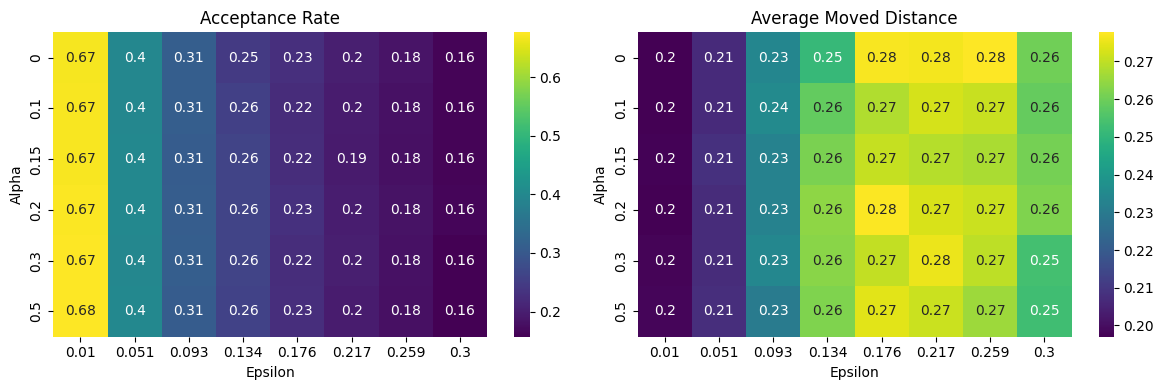

In [198]:
epsilons = np.round(epsilons, decimals=3)
# Plotting
plt.figure(figsize=(12, 4))

# Heatmap for Acceptance Rates
plt.subplot(1, 2, 1)
sns.heatmap(acceptance_rates, annot=True, xticklabels=epsilons, yticklabels=alphas, cmap='viridis')
plt.title('Acceptance Rate')
plt.xlabel('Epsilon')
plt.ylabel('Alpha')

# Heatmap for Average Moved Distance
plt.subplot(1, 2, 2)
sns.heatmap(average_distances, annot=True, xticklabels=epsilons, yticklabels=alphas, cmap='viridis')
plt.title('Average Moved Distance')
plt.xlabel('Epsilon')
plt.ylabel('Alpha')

plt.tight_layout()
plt.show()

In [199]:
average_distances

array([[0.1972328 , 0.20667048, 0.23393264, 0.25098679, 0.2768862 ,
        0.27621458, 0.27772845, 0.26028262],
       [0.19700586, 0.20661958, 0.23520887, 0.25827025, 0.26811428,
        0.272389  , 0.27098818, 0.25858446],
       [0.19754549, 0.20819535, 0.23235288, 0.26160377, 0.27064449,
        0.26861315, 0.2674938 , 0.26100357],
       [0.19728369, 0.20692522, 0.23292331, 0.26414639, 0.27713992,
        0.27285065, 0.27129848, 0.26199074],
       [0.19769556, 0.20703162, 0.23425366, 0.26324032, 0.27043083,
        0.27521139, 0.26975556, 0.25353952],
       [0.19798447, 0.20767235, 0.23040263, 0.26200958, 0.27396367,
        0.27126905, 0.26602239, 0.25309564]])

In [204]:
vanilla_lang_sampler = EnsembleLangevinSampler(gmm_env2, ensemble=50, epsilon=0.26)
vanilla_samps = vanilla_lang_sampler.sample(iterations=2000, use_cov=True)
best_lang_sampler = EnsembleLangevinSampler(gmm_env2, ensemble=50, epsilon=0.176, alpha=0.2)
lang_samps = best_lang_sampler.sample(iterations=2000, use_cov=True)  # Adjust the number of samples as needed
best_mh_sampler = MetropolisHastingsSampler(gmm_env2, proposal_std=1)
mh_samps = best_mh_sampler.sample(100000)  # Adjust the number of samples as needed

100%|██████████| 2000/2000 [00:00<00:00, 3426.86it/s]


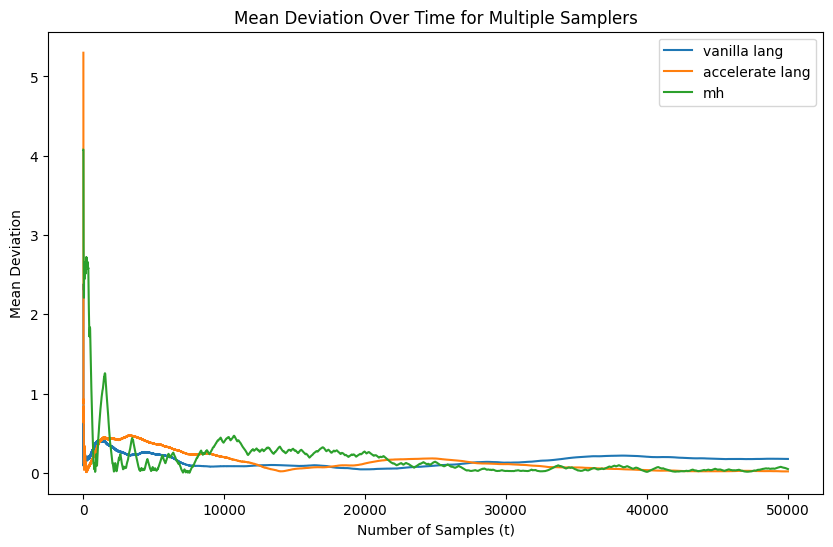

In [219]:
plot_mean_deviation([vanilla_samps[50000:,], lang_samps[50000:,], mh_samps[50000:,]], gmm_env, ["vanilla lang", "accelerate lang", "mh"])

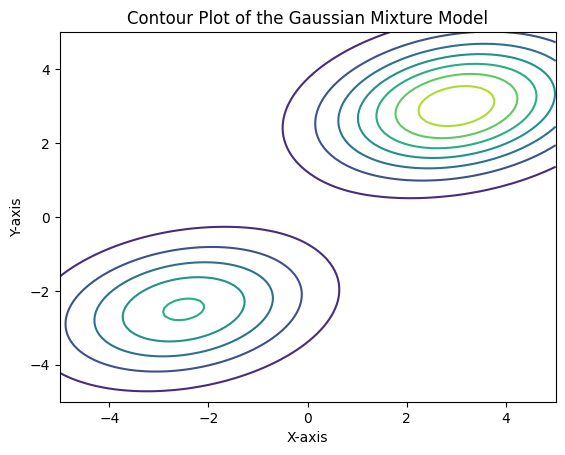

In [211]:
means = [np.array([-2.5, -2.5]), np.array([3, 3])]  # Example 2D means
cov_mat = np.array([[3, 0.5], [0.5, 1.5]])
covariances = [cov_mat, cov_mat]  # 2x2 identity matrices for each component
weights = [0.4, 0.6]  # Equal weights for each component

gmm_env3 = GaussianMixtures(means, covariances, weights)
ax = gmm_env3.contour_plot()
plt.show()

In [214]:
alphas = [0, 0.1, 0.15, 0.2, 0.3, 0.5]  # Adjust these ranges as needed
epsilons = np.linspace(0.01, 0.5, 8)

# Grid to store results
acceptance_rates = np.zeros((len(alphas), len(epsilons)))
average_distances = np.zeros((len(alphas), len(epsilons)))
average_acc_distances = np.zeros((len(alphas), len(epsilons)))

for i, alpha in enumerate(alphas):
    for j, epsilon in enumerate(epsilons):
        sampler = EnsembleLangevinSampler(gmm_env3, ensemble=50, epsilon=epsilon, alpha=alpha)
        sampler.sample(iterations=2000, use_cov=True)  # Adjust the number of samples as needed

        acceptance_rates[i, j] = sampler.acceptance_rate()
        average_distances[i, j] = sampler.average_moved_distance(total=True)
        average_acc_distances[i, j] = sampler.average_moved_distance(total=False)

100%|██████████| 2000/2000 [00:00<00:00, 3482.44it/s]


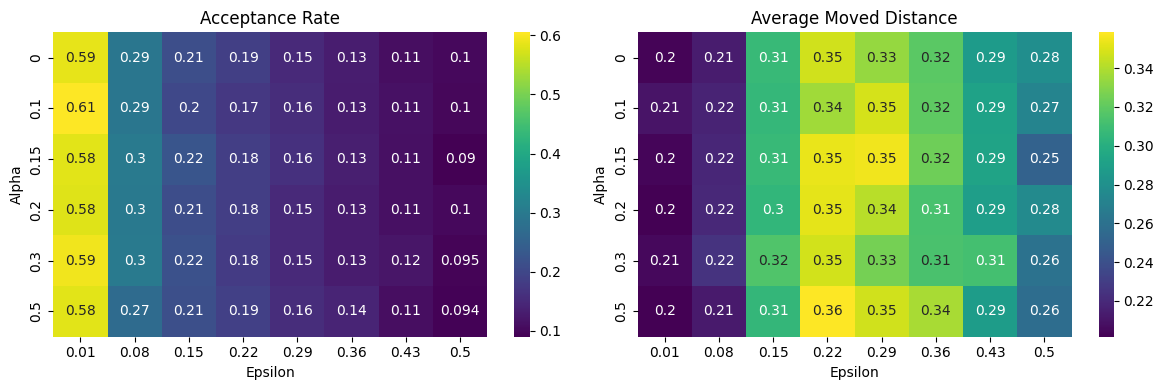

In [220]:
epsilons = np.round(epsilons, decimals=3)
# Plotting
plt.figure(figsize=(12, 4))

# Heatmap for Acceptance Rates
plt.subplot(1, 2, 1)
sns.heatmap(acceptance_rates, annot=True, xticklabels=epsilons, yticklabels=alphas, cmap='viridis')
plt.title('Acceptance Rate')
plt.xlabel('Epsilon')
plt.ylabel('Alpha')

# Heatmap for Average Moved Distance
plt.subplot(1, 2, 2)
sns.heatmap(average_distances, annot=True, xticklabels=epsilons, yticklabels=alphas, cmap='viridis')
plt.title('Average Moved Distance')
plt.xlabel('Epsilon')
plt.ylabel('Alpha')

plt.tight_layout()
plt.show()

In [224]:
vanilla_lang_sampler = EnsembleLangevinSampler(gmm_env3, ensemble=50, epsilon=0.22)
vanilla_samps = vanilla_lang_sampler.sample(iterations=2000, use_cov=True)
best_lang_sampler = EnsembleLangevinSampler(gmm_env3, ensemble=50, epsilon=0.22, alpha=0.5)
lang_samps = best_lang_sampler.sample(iterations=2000, use_cov=True)  # Adjust the number of samples as needed
best_mh_sampler = MetropolisHastingsSampler(gmm_env3, proposal_std=1)
mh_samps = best_mh_sampler.sample(100000)  # Adjust the number of samples as needed

100%|██████████| 2000/2000 [00:00<00:00, 3432.31it/s]


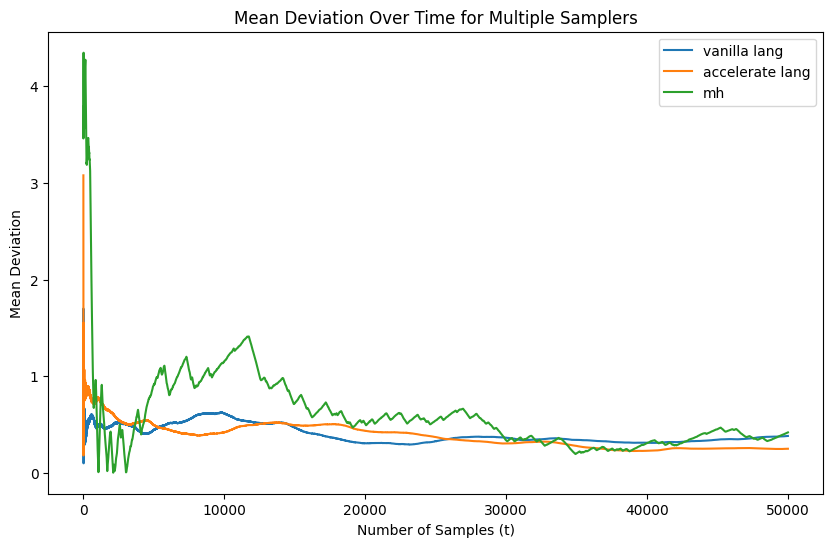

In [225]:
plot_mean_deviation([vanilla_samps[50000:,], lang_samps[50000:,], mh_samps[50000:,]], gmm_env3, ["vanilla lang", "accelerate lang", "mh"])

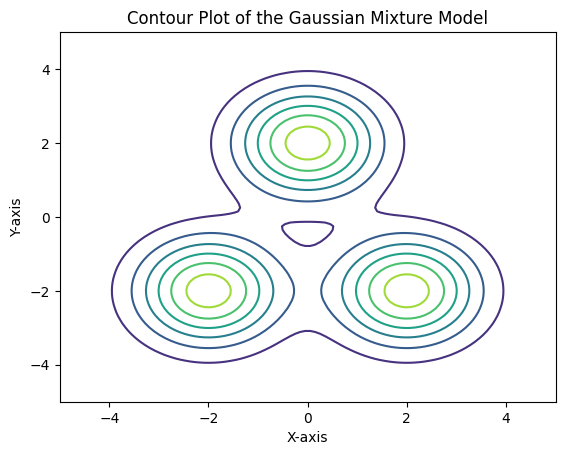

In [244]:
means = [np.array([-2, -2]), np.array([2, -2]), np.array([0, 2])]  # Example 2D means
cov_mat = np.array([[1, 0], [0, 1]])
covariances = [cov_mat, cov_mat, cov_mat]  # 2x2 identity matrices for each component
weights = [1/3, 1/3, 1/3]  # Equal weights for each component

gmm_env4 = GaussianMixtures(means, covariances, weights)
ax = gmm_env4.contour_plot()
plt.show()

In [245]:
alphas = [0, 0.1, 0.15, 0.2, 0.3, 0.5]  # Adjust these ranges as needed
epsilons = np.linspace(0.01, 0.5, 8)

# Grid to store results
acceptance_rates = np.zeros((len(alphas), len(epsilons)))
average_distances = np.zeros((len(alphas), len(epsilons)))
average_acc_distances = np.zeros((len(alphas), len(epsilons)))

for i, alpha in enumerate(alphas):
    for j, epsilon in enumerate(epsilons):
        sampler = EnsembleLangevinSampler(gmm_env4, ensemble=50, epsilon=epsilon, alpha=alpha)
        sampler.sample(iterations=2000, use_cov=True)  # Adjust the number of samples as needed

        acceptance_rates[i, j] = sampler.acceptance_rate()
        average_distances[i, j] = sampler.average_moved_distance(total=True)
        average_acc_distances[i, j] = sampler.average_moved_distance(total=False)

100%|██████████| 2000/2000 [00:00<00:00, 2552.25it/s]


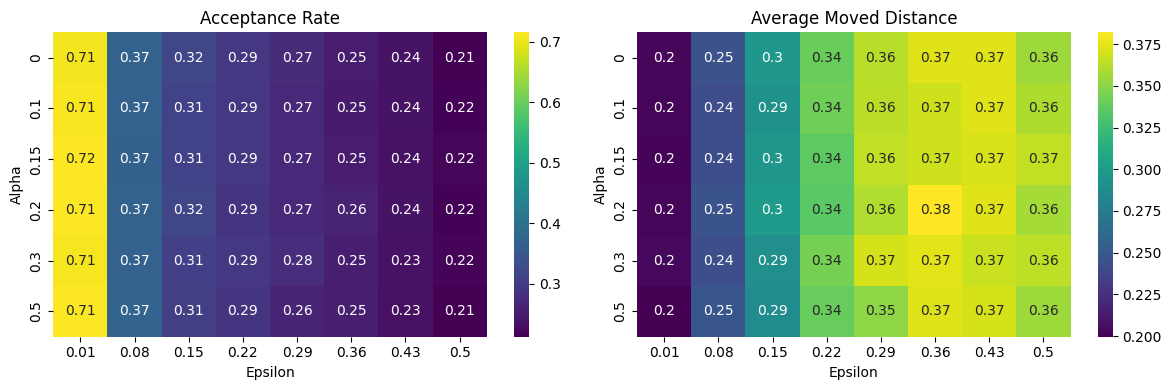

In [246]:
epsilons = np.round(epsilons, decimals=3)
# Plotting
plt.figure(figsize=(12, 4))

# Heatmap for Acceptance Rates
plt.subplot(1, 2, 1)
sns.heatmap(acceptance_rates, annot=True, xticklabels=epsilons, yticklabels=alphas, cmap='viridis')
plt.title('Acceptance Rate')
plt.xlabel('Epsilon')
plt.ylabel('Alpha')

# Heatmap for Average Moved Distance
plt.subplot(1, 2, 2)
sns.heatmap(average_distances, annot=True, xticklabels=epsilons, yticklabels=alphas, cmap='viridis')
plt.title('Average Moved Distance')
plt.xlabel('Epsilon')
plt.ylabel('Alpha')

plt.tight_layout()
plt.show()

In [247]:
vanilla_lang_sampler = EnsembleLangevinSampler(gmm_env4, ensemble=50, epsilon=0.36)
vanilla_samps = vanilla_lang_sampler.sample(iterations=2000, use_cov=True)
best_lang_sampler = EnsembleLangevinSampler(gmm_env4, ensemble=50, epsilon=0.36, alpha=0.2)
lang_samps = best_lang_sampler.sample(iterations=2000, use_cov=True)  # Adjust the number of samples as needed
best_mh_sampler = MetropolisHastingsSampler(gmm_env4, proposal_std=1)
mh_samps = best_mh_sampler.sample(100000)  # Adjust the number of samples as needed

100%|██████████| 2000/2000 [00:00<00:00, 2585.51it/s]


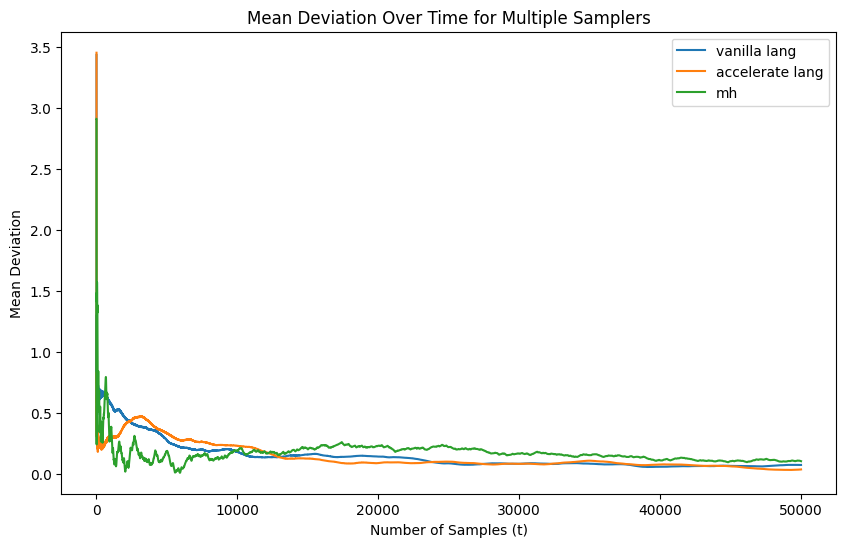

In [250]:
plot_mean_deviation([vanilla_samps[50000:,], lang_samps[50000:,], mh_samps[50000:,]], gmm_env4, ["vanilla lang", "accelerate lang", "mh"])

### Over the last iteration

In [261]:
alphas = [0, 0.1, 0.15, 0.2, 0.3, 0.5]  # Adjust these ranges as needed
epsilons = np.linspace(0.01, 0.5, 8)

# Grid to store results
mean_dev = np.zeros((len(alphas), len(epsilons)))

true_mean = calculate_ground_truth_mean(gmm_env4)
for i, alpha in enumerate(alphas):
    for j, epsilon in enumerate(epsilons):
        sampler = EnsembleLangevinSampler(gmm_env4, ensemble=5000, epsilon=epsilon, alpha=alpha)
        s = sampler.sample(iterations=1000, use_cov=True)[-1000:,] # Adjust the number of samples as needed
        mean_dev[i, j] = np.linalg.norm(true_mean - np.mean(s, axis=0))

100%|██████████| 1000/1000 [00:01<00:00, 544.47it/s]


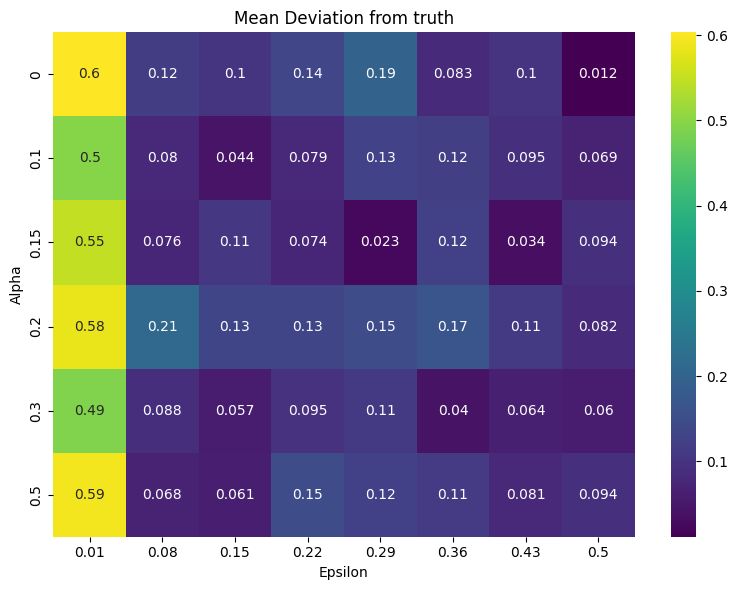

In [260]:
epsilons = np.round(epsilons, decimals=3)
# Plotting
plt.figure(figsize=(8, 6))

# Heatmap for Acceptance Rates
sns.heatmap(mean_dev, annot=True, xticklabels=epsilons, yticklabels=alphas, cmap='viridis')
plt.title('Mean Deviation from truth')
plt.xlabel('Epsilon')
plt.ylabel('Alpha')

plt.tight_layout()
plt.show()

### Comparing with without the covariance matrix

In [262]:
alphas = [0, 0.1, 0.15, 0.2, 0.3, 0.5]  # Adjust these ranges as needed
epsilons = np.linspace(0.01, 0.5, 8)

# Grid to store results
acceptance_rates = np.zeros((len(alphas), len(epsilons)))
average_distances = np.zeros((len(alphas), len(epsilons)))
average_acc_distances = np.zeros((len(alphas), len(epsilons)))

for i, alpha in enumerate(alphas):
    for j, epsilon in enumerate(epsilons):
        sampler = EnsembleLangevinSampler(gmm_env4, ensemble=50, epsilon=epsilon, alpha=alpha)
        sampler.sample(iterations=2000, use_cov=False)  # Adjust the number of samples as needed

        acceptance_rates[i, j] = sampler.acceptance_rate()
        average_distances[i, j] = sampler.average_moved_distance(total=True)
        average_acc_distances[i, j] = sampler.average_moved_distance(total=False)

100%|██████████| 2000/2000 [00:00<00:00, 3249.92it/s]


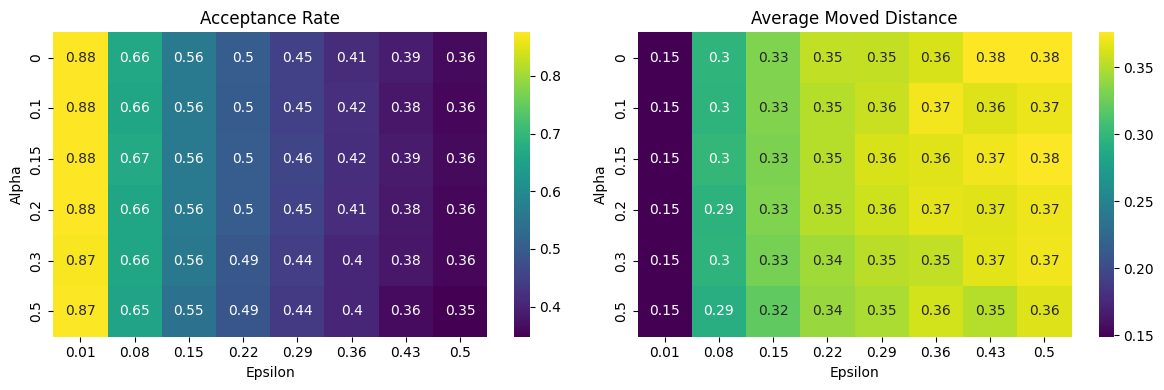

In [263]:
epsilons = np.round(epsilons, decimals=3)
# Plotting
plt.figure(figsize=(12, 4))

# Heatmap for Acceptance Rates
plt.subplot(1, 2, 1)
sns.heatmap(acceptance_rates, annot=True, xticklabels=epsilons, yticklabels=alphas, cmap='viridis')
plt.title('Acceptance Rate')
plt.xlabel('Epsilon')
plt.ylabel('Alpha')

# Heatmap for Average Moved Distance
plt.subplot(1, 2, 2)
sns.heatmap(average_distances, annot=True, xticklabels=epsilons, yticklabels=alphas, cmap='viridis')
plt.title('Average Moved Distance')
plt.xlabel('Epsilon')
plt.ylabel('Alpha')

plt.tight_layout()
plt.show()

100%|██████████| 2000/2000 [00:01<00:00, 1610.91it/s]


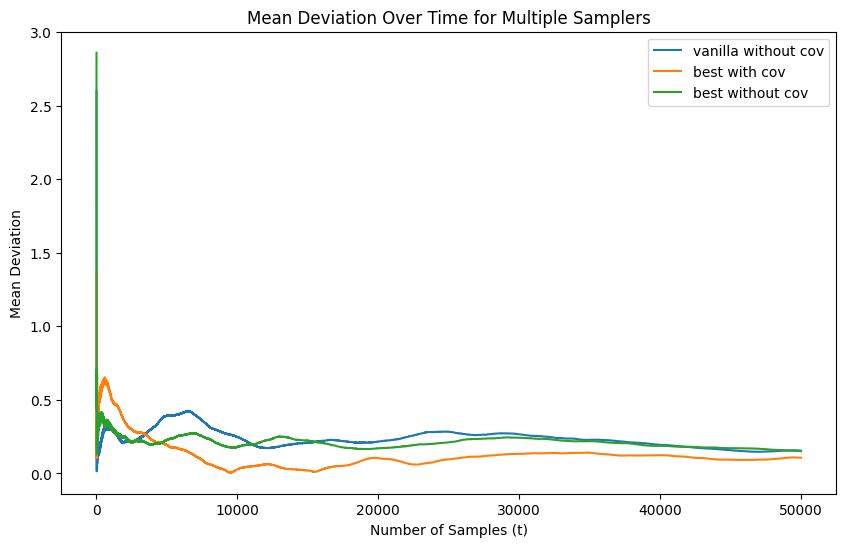

In [264]:
vanilla_lang_sampler = EnsembleLangevinSampler(gmm_env4, ensemble=50, epsilon=0.5)
vanilla_samps = vanilla_lang_sampler.sample(iterations=2000, use_cov=False)
best_lang_sampler = EnsembleLangevinSampler(gmm_env4, ensemble=50, epsilon=0.36, alpha=0.2)
lang_samps = best_lang_sampler.sample(iterations=2000, use_cov=True)  # Adjust the number of samples as needed
best_lang_sampler_wo = EnsembleLangevinSampler(gmm_env4, ensemble=50, epsilon=0.5, alpha=0.15)
lang_samps_wo = best_lang_sampler_wo.sample(iterations=2000, use_cov=False)  # Adjust the number of samples as needed

plot_mean_deviation([vanilla_samps[50000:,], lang_samps[50000:,], lang_samps_wo[50000:,]], gmm_env4, ["vanilla without cov", "best with cov", "best without cov"])